In [ ]:
import pandas as pd # For reading CSV files
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations

terms_list_original = [
    "abstraction",
    "algorithm",
    "algorithmic thinking",
    "coding",
    "collaboration",
    "cooperation",
    "creativity",
    "critical thinking",
    "debug",
    "decomposition",
    "evaluation",
    "generalization",
    "logic",
    "logical thinking",
    "modularity",
    "patterns recognition",
    "problem solving",
    "programming",
    "conditionals",
    "control structures",
    "directions",
    "events",
    "funtions",
    "loops",
    "modular structure",
    "parallelism",
    "sequences",
    "software/hardware",
    "variables",
    "emotional",
    "engagement",
    "motivation",
    "perceptions",
    "persistence",
    "self-efficacy",
    "self-perceived",
    "classical test theory",
    "confirmatory factor analysis",
    "exploratory factor analysis",
    "item response theory",
    "reliability",
    "structural equation model",
    "validity",
    "beginners computational thinking test",
    "coding attitudes survey",
    "collaborative computing observation instrument",
    "competent computational thinking test",
    "computational thinking skills test",
    "computational concepts",
    "computational thinking assessment for chinese elementary students",
    "computational thinking challenge",
    "computational thinking levels scale",
    "computational thinking scale",
    "computational thinking skill levels scale",
    "computational thinking test",
    "computational thinking test",
    "computational thinking test for elementary school students",
    "computational thinking test for lower primary",
    "computational thinking-skill tasks on numbers and arithmetic",
    "computerized adaptive programming concepts test",
    "ct scale",
    "elementary student coding attitudes survey",
    "general self-efficacy scale",
    "ict competency test",
    "instrument of computational identity",
    "kbit fluid intelligence subtest",
    "mastery of computational concepts test and an algorithmic test",
    "multidimensional 21st century skills scale",
    "self-efficacy scale",
    "stem learning attitude scale",
    "the computational thinking scale",
    "no experimental",
    "experimental",
    "longitudinal research",
    "mixed methods",
    "post-test",
    "pre-test",
    "quasi-experiments",
    "upper elementary education",
    "primary school",
    "early childhood education",
    "secondary school",
    "high school",
    "university",
    "block programming",
    "mobile application",
    "pair programming",
    "plugged activities",
    "programming",
    "robotics",
    "spreadsheet",
    "stem",
    "unplugged activities",
    "construct-by-self mind mapping",
    "construct-on-scaffold mind mapping",
    "design-based learning",
    "evidence-centred design approach",
    "gamification",
    "reverse engineering pedagogy",
    "technology-enhanced learning",
    "collaborative learning",
    "cooperative learning",
    "flipped classroom",
    "game-based learning",
    "inquiry-based learning",
    "personalized learning",
    "problem-based learning",
    "project-based learning",
    "universal design for learning",
    "alice",
    "arduino",
    "scratch",
    "scratchjr",
    "blockly games",
    "code.org",
    "codecombat",
    "csunplugged",
    "robot turtles",
    "hello ruby",
    "kodable",
    "lightbotjr",
    "kibo robots",
    "bee bot",
    "cubetto",
    "minecraft",
    "agent sheets",
    "mimo",
    "py–learn",
    "spacechem",
]

PROCESS INITIATED
Attempting to read CSV file: ../../resources/collection.csv
Successfully loaded 867 abstracts from 'Abstract'.
Computing graph!
Initially added 128 unique terms as nodes.
Processed abstracts. Found 948 unique co-occurrence edges.
Graph has 128 nodes and 948 edges before filtering.
Found 45 isolated nodes (no connections): ['agent sheets', 'bee bot', 'blockly games', 'codecombat', 'coding attitudes survey', 'collaborative computing observation instrument', 'computational thinking assessment for chinese elementary students', 'computational thinking challenge', 'computational thinking skill levels scale', 'computational thinking skills test', 'computational thinking test for elementary school students', 'computational thinking-skill tasks on numbers and arithmetic', 'computerized adaptive programming concepts test', 'construct-by-self mind mapping', 'construct-on-scaffold mind mapping', 'control structures', 'csunplugged', 'elementary student coding attitudes survey', 'f

/var/folders/5q/hrp9frhs4gg61s0y_fqgdvtc0000gn/T/ipykernel_28899/1094925551.py:227: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


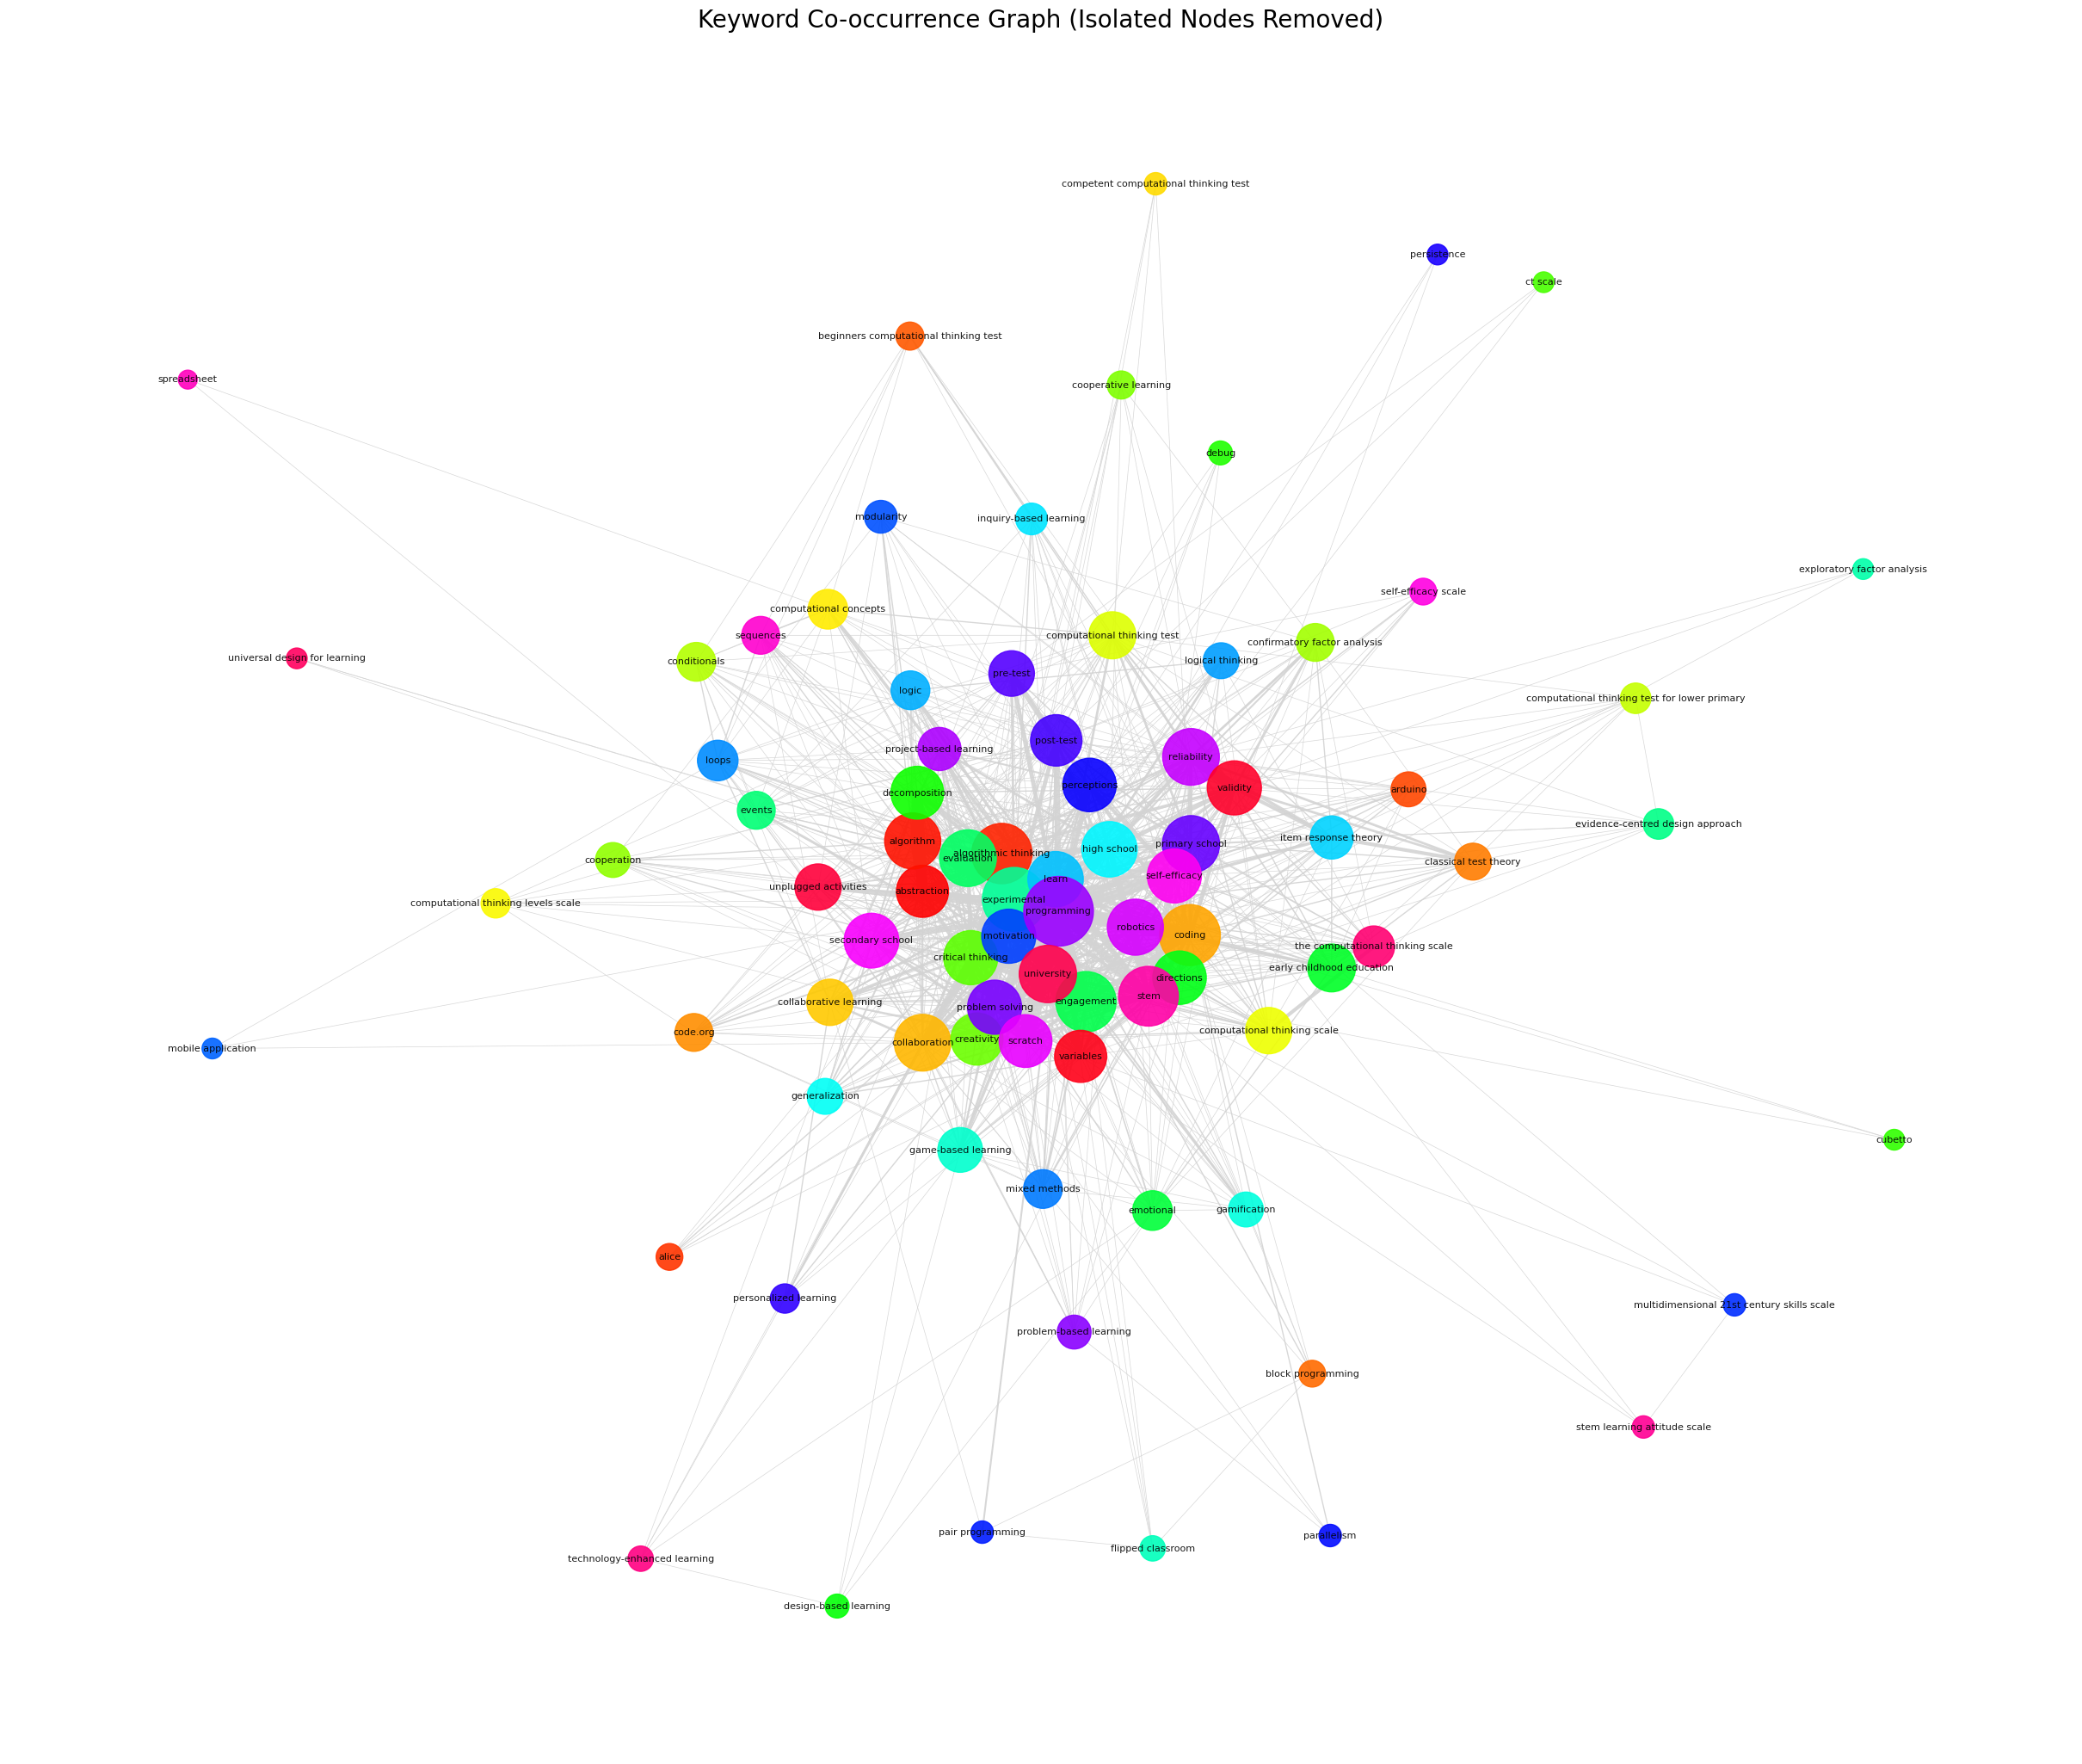

Graph display complete.


In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations
import re
import matplotlib.cm as cm
import numpy as np

# --- Inputs ---
print("PROCESS INITIATED")
# 1. Define the path to your CSV file
# >>> IMPORTANT: Make sure this path is correct in your environment <<<
csv_file_path = "../../resources/collection.csv" # <-- Adjust if needed
print(f"Attempting to read CSV file: {csv_file_path}")

# --- Load Abstracts from CSV ---
research_abstracts = []
abstract_column_name = "Abstract" # Default column name
try:
    df = pd.read_csv(csv_file_path)
    # Check for primary abstract column
    if abstract_column_name in df.columns:
        research_abstracts = df[abstract_column_name].dropna().astype(str).str.lower().tolist()
        print(f"Successfully loaded {len(research_abstracts)} abstracts from '{abstract_column_name}'.")
    # Check for alternative abstract column if primary not found
    elif "Abstract." in df.columns:
        alternative_abstract_column_name = "Abstract."
        print(f"Warning: Column '{abstract_column_name}' not found. Using '{alternative_abstract_column_name}'.")
        abstract_column_name = alternative_abstract_column_name
        research_abstracts = df[abstract_column_name].dropna().astype(str).str.lower().tolist()
        print(f"Successfully loaded {len(research_abstracts)} abstracts from '{abstract_column_name}'.")
    else:
        # No suitable column found
        print(f"Error: Neither 'Abstract' nor 'Abstract.' column found in: {csv_file_path}")
        print(f"Available columns: {df.columns.tolist()}")
        exit()

    # Check if abstracts list is empty after loading
    if not research_abstracts:
        print(f"Warning: The column '{abstract_column_name}' was found, but it contains no valid abstracts after processing.")

except FileNotFoundError:
    print(f"Error: File not found at the specified path: {csv_file_path}")
    print("Please ensure the path is correct and the file exists.")
    exit()
except pd.errors.EmptyDataError:
    print(f"Error: The CSV file at {csv_file_path} is empty.")
    exit()
except Exception as e:
    print(f"An error occurred while reading or processing the CSV file: {e}")
    exit()

if not research_abstracts:
    print("No abstracts were loaded. Exiting.")
    exit()

# List of terms (keywords) to look for
# (Using the list provided in the original request)
terms_list = [
    "abstraction", "algorithm", "algorithmic thinking", "coding", "collaboration",
    "cooperation", "creativity", "critical thinking", "debug", "decomposition",
    "evaluation", "generalization", "logic", "logical thinking", "modularity",
    "patterns recognition", "problem solving", "programming", "conditionals",
    "control structures", "directions", "events", "funtions", "loops", # Typo: "functions"?
    "modular structure", "parallelism", "sequences", "software/hardware",
    "variables", "emotional", "engagement", "motivation", "perceptions",
    "persistence", "self-efficacy", "self-perceived", "classical test theory",
    "confirmatory factor analysis", "exploratory factor analysis", "item response theory",
    "reliability", "structural equation model", "validity",
    "beginners computational thinking test", "coding attitudes survey",
    "collaborative computing observation instrument", "competent computational thinking test",
    "computational thinking skills test", "computational concepts",
    "computational thinking assessment for chinese elementary students",
    "computational thinking challenge", "computational thinking levels scale",
    "computational thinking scale", "computational thinking skill levels scale",
    "computational thinking test", # Duplicate
    "computational thinking test for elementary school students",
    "computational thinking test for lower primary",
    "computational thinking-skill tasks on numbers and arithmetic",
    "computerized adaptive programming concepts test", "ct scale",
    "elementary student coding attitudes survey", "general self-efficacy scale",
    "ict competency test", "instrument of computational identity",
    "kbit fluid intelligence subtest",
    "mastery of computational concepts test and an algorithmic test",
    "multidimensional 21st century skills scale", "self-efficacy scale", # Duplicate
    "stem learning attitude scale", "the computational thinking scale",
    "no experimental", "experimental", "longitudinal research", "mixed methods",
    "post-test", "pre-test", "quasi-experiments", "upper elementary education",
    "primary school", "early childhood education", "secondary school", "high school",
    "university", "block programming", "mobile application", "pair programming",
    "plugged activities", "programming", # Duplicate
    "robotics", "spreadsheet", "stem", # Duplicate
    "unplugged activities", "construct-by-self mind mapping",
    "construct-on-scaffold mind mapping", "design-based learning",
    "evidence-centred design approach", "gamification", "reverse engineering pedagogy",
    "technology-enhanced learning", "collaborative learning", "cooperative learning",
    "flipped classroom", "game-based learning", "inquiry-based learning",
    "personalized learning", "problem-based learning", "project-based learning",
    "universal design for learning", "alice", "arduino", "scratch", "scratchjr",
    "blockly games", "code.org", "codecombat", "csunplugged", "robot turtles",
    "hello ruby", "kodable", "lightbotjr", "kibo robots", "bee bot", "cubetto",
    "minecraft", "agent sheets", "mimo", "py-learn", "learn", "spacechem"
]


print("Computing graph!")

# --- Graph Creation ---
# 1. Initialize an empty graph
G = nx.Graph()

# 2. Add all defined terms as nodes (ensuring uniqueness)
unique_terms = sorted(list(set(terms_list)))
G.add_nodes_from(unique_terms)
initial_node_count = len(unique_terms)
print(f"Initially added {initial_node_count} unique terms as nodes.")

# 3. Process each abstract for co-occurring terms and add weighted edges
edge_count = 0
for abstract in research_abstracts:
    found_terms_in_abstract = []
    # Use regex for whole word, case-insensitive matching
    for term in unique_terms:
        # Optimization: only search if the term could plausibly be in the abstract
        if term in abstract: # Quick check before expensive regex
            if re.search(r'\b' + re.escape(term) + r'\b', abstract, re.IGNORECASE):
                found_terms_in_abstract.append(term)
        # Or skip the quick check if terms are very short or accuracy is paramount
        # if re.search(r'\b' + re.escape(term) + r'\b', abstract, re.IGNORECASE):
        #        found_terms_in_abstract.append(term)


    # Add edges for co-occurring terms
    if len(found_terms_in_abstract) >= 2:
        for term_pair in combinations(found_terms_in_abstract, 2):
            u, v = term_pair
            if G.has_edge(u, v):
                G[u][v]['weight'] = G[u][v].get('weight', 1) + 1
            else:
                G.add_edge(u, v, weight=1)
                edge_count += 1

print(f"Processed abstracts. Found {edge_count} unique co-occurrence edges.")
print(f"Graph has {G.number_of_nodes()} nodes and {G.number_of_edges()} edges before filtering.")

# --- <<< Modification Start: Remove Isolated Nodes >>> ---
# 4. Identify and remove nodes with degree 0 (no edges)
isolated_nodes = list(nx.isolates(G))
if isolated_nodes:
    print(f"Found {len(isolated_nodes)} isolated nodes (no connections): {isolated_nodes}")
    G.remove_nodes_from(isolated_nodes)
    print(f"Removed isolated nodes. Graph now has {G.number_of_nodes()} nodes.")
else:
    print("No isolated nodes found.")
# --- <<< Modification End >>> ---


# --- Recalculate Node Properties for Remaining Nodes ---
# Ensure calculations are done *after* removing isolates

if G.number_of_nodes() > 0:
    # Get the list of nodes *actually* in the graph now
    node_list_for_drawing = list(G.nodes())

    # --- Node Sizing based on Degree ---
    node_degrees = dict(G.degree()) # Degrees of remaining nodes
    base_node_size = 150
    scale_per_degree = 50
    node_sizes = [base_node_size + node_degrees.get(node, 0) * scale_per_degree for node in node_list_for_drawing]

    # --- Node Coloring ---
    num_nodes = len(node_list_for_drawing)
    if num_nodes > 0:
        colors = cm.hsv(np.linspace(0, 1, num_nodes))
    else:
        colors = [] # Should not happen if G.number_of_nodes() > 0 check passed

    # --- Edge Widths ---
    # Calculate edge widths based on weights for edges present in the filtered graph
    edge_widths = [G[u][v].get('weight', 1) * 0.5 for u, v in G.edges()]

else:
    # Handle case where filtering might leave an empty graph
    node_list_for_drawing = []
    node_sizes = []
    colors = []
    edge_widths = []
    print("Graph is empty after removing isolated nodes. Nothing to draw.")


# --- Graph Drawing ---
if node_list_for_drawing: # Check if there's anything left to draw
    print("Drawing graph...")
    plt.figure(figsize=(24, 20))

    # Layout algorithm
    try:
        num_nodes_for_layout = G.number_of_nodes()
        # Adjust k based on remaining node count
        k_value = 1.0/np.sqrt(num_nodes_for_layout) if num_nodes_for_layout > 1 else 1
        pos = nx.spring_layout(G, k=k_value, iterations=50, seed=42)
        print(f"Using spring_layout with k={k_value:.2f}")
    except Exception as e:
        print(f"Spring layout failed: {e}. Falling back to Kamada-Kawai.")
        try:
            pos = nx.kamada_kawai_layout(G)
        except Exception as e2:
            print(f"Kamada-Kawai layout failed: {e2}. Falling back to random layout.")
            pos = nx.random_layout(G)

    # Draw the graph
    nx.draw(G,
            pos,
            nodelist=node_list_for_drawing,
            with_labels=True,
            node_size=node_sizes,
            node_color=colors,
            font_size=8,
            font_weight="normal",
            edge_color="lightgrey",
            width=edge_widths,
            alpha=0.9
            )

    plt.title("Keyword Co-occurrence Graph (Isolated Nodes Removed)", size=20)
    plt.axis('off')
    plt.tight_layout()
    plt.show()
    print("Graph display complete.")
else:
    # This message is now redundant due to the check earlier, but kept for clarity
    print("Skipping drawing as there are no nodes left in the graph after filtering.")